In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [2]:
sample_submission = pd.read_csv('/kaggle/input/aviakompaniya/sample_submission.csv')
test_data = pd.read_csv('/kaggle/input/aviakompaniya/test_dataset.csv')
train_data = pd.read_csv('/kaggle/input/aviakompaniya/train_dataset.csv')

Tarkib:

Gender: yo'lovchilarning jinsi (ayol, erkak)

Customer Type: mijoz turi (sodiq mijoz, ishonchsiz mijoz)

Age: yo'lovchilarning haqiqiy yoshi

Type of Travel: yo'lovchilar parvozining maqsadi (shaxsiy sayohat, biznes sayohat)

Class: yo'lovchilar samolyotida sayohat klassi (Business, Eco, Eco Plus)

Flight distance: Ushbu sayohatning parvoz masofasi

Inflight wifi service: Parvoz ichidagi Wi-Fi xizmatidan qoniqish darajasi (0: Tegishli emas; 1-5)

Departure/Arrival time convenient: Ketish/Kelish vaqtining qoniqish darajasi

Ease of Online booking: Onlayn bron qilishdan qoniqish darajasi

Gate location: Darvoza joylashuvidan qoniqish darajasi

Food and drink: Oziq-ovqat va ichimlikdan qoniqish darajasi

Online boarding: Onlayn bortdan qoniqish darajasi

Seat comfort: O'rindiqning qulayligidan qoniqish darajasi

Inflight entertainment: Parvoz ichidagi o'yin-kulgidan qoniqish darajasi

On-board service: Bort xizmatidan qoniqish darajasi

Leg room service: oyoq xonasi xizmatidan qoniqish darajasi

Baggage handling: bagajni tashishdan qoniqish darajasi

Check-in service: Ro'yxatdan o'tish xizmatidan qoniqish darajasi

Inflight service: Parvoz ichidagi xizmatdan qoniqish darajasi

Cleanliness: Tozalikdan qoniqish darajasi

Departure Delay in Minutes: jo‘nash vaqtida kechikish daqiqalari

Arrival Delay in Minutes: yetib kelganda kechikish daqiqalari

Satisfaction: Aviakompaniyaning qoniqish darajasi (qoniqish, neytral yoki norozilik)

In [3]:
train_data.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0
5,6,Male,Loyal Customer,30,Personal Travel,Eco Plus,1034,2,4,2,...,5,4,5,5,4,4,5,0,0.0,0
6,7,Male,Loyal Customer,38,Business travel,Eco,826,5,1,1,...,5,1,4,4,5,4,5,2,5.0,1
7,8,Female,Loyal Customer,39,Business travel,Eco Plus,162,3,4,4,...,3,3,5,5,1,3,3,0,0.0,1
8,9,Male,disloyal Customer,43,Business travel,Business,541,2,2,2,...,3,5,2,5,4,4,3,0,0.0,0
9,10,Female,disloyal Customer,24,Business travel,Eco,1065,4,4,4,...,2,4,2,4,2,4,2,10,17.0,0


In [4]:
train_data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,5000.50000,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,2886.89568,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,1.00000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,5000.50000,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,7500.25000,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,10000.00000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


**Data Cleaning**

In [5]:
len(test_data)

4000

In [6]:
#train data
train_data.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [7]:
test_data.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             19
dtype: int64

In [8]:
train_data['Arrival Delay in Minutes'] = train_data['Arrival Delay in Minutes'].fillna(train_data['Arrival Delay in Minutes'].mean())
test_data['Arrival Delay in Minutes'] = test_data['Arrival Delay in Minutes'].fillna(test_data['Arrival Delay in Minutes'].mean())

Outlier identify

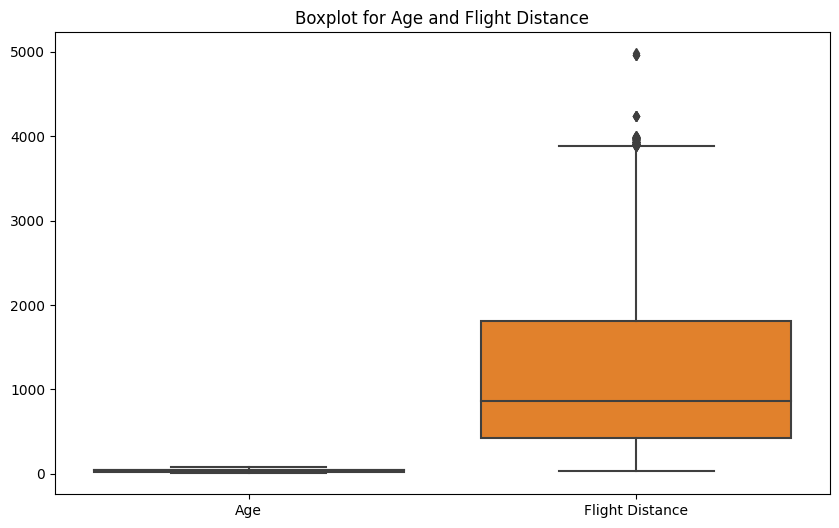

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data[['Age', 'Flight Distance']])
plt.title('Boxplot for Age and Flight Distance')
plt.show()

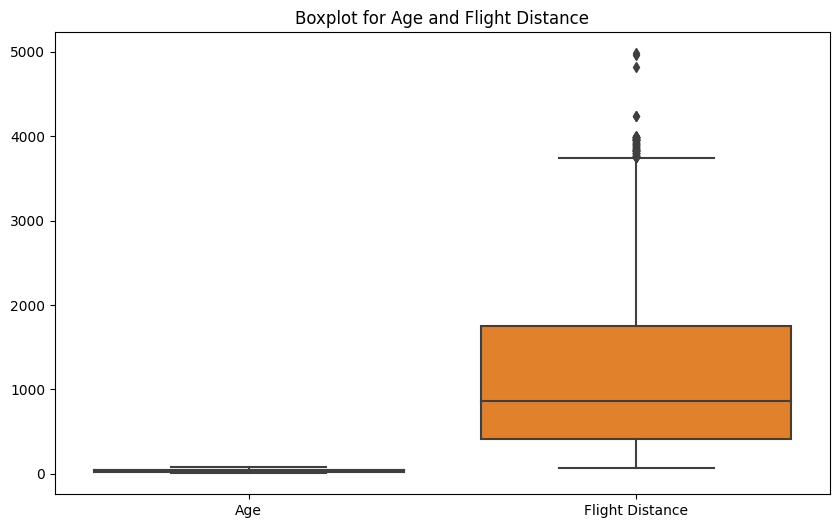

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=test_data[['Age', 'Flight Distance']])
plt.title('Boxplot for Age and Flight Distance')
plt.show()

Categorical data

In [11]:
#Train data One hot encoding


# Kategorik ustunlar ro'yxati
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# OneHotEncoder obyekti yaratish
encoder = OneHotEncoder(sparse=False, drop='first')

# Kategorik ustunlarni tanlab olish
categorical_data = train_data[categorical_columns]

# One-Hot Encodingni qo'llash
encoded_data = encoder.fit_transform(categorical_data)

# Encoded ustun nomlarini olish
encoded_columns = encoder.get_feature_names_out(categorical_columns)

# One-Hot Encoding qilingan ma'lumotlarni DataFramega o'tkazish
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Asl ma'lumotlarni One-Hot Encoding qilingan ma'lumotlar bilan birlashtirish
train_data = train_data.drop(columns=categorical_columns).join(encoded_df)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
#Test data One hot encoding

# Kategorik ustunlar ro'yxati
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# OneHotEncoder obyekti yaratish
encoder = OneHotEncoder(sparse=False, drop='first')

# Kategorik ustunlarni tanlab olish
categorical_data = test_data[categorical_columns]

# One-Hot Encodingni qo'llash
encoded_data = encoder.fit_transform(categorical_data)

# Encoded ustun nomlarini olish
encoded_columns = encoder.get_feature_names_out(categorical_columns)

# One-Hot Encoding qilingan ma'lumotlarni DataFramega o'tkazish
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Asl ma'lumotlarni One-Hot Encoding qilingan ma'lumotlar bilan birlashtirish
test_data = test_data.drop(columns=categorical_columns).join(encoded_df)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Rename datasets columns

In [13]:
train_data = train_data.rename(columns={'Gender_Male': 'Gender', 'Customer Type_disloyal Customer	': 'Customer Type', 'Type of Travel_Personal Travel	': 'Type of Travel'})
test_data = test_data.rename(columns={'Gender_Male': 'Gender', 'Customer Type_disloyal Customer	': 'Customer Type', 'Type of Travel_Personal Travel	': 'Type of Travel'})

In [14]:
train_data.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1,33,571,2,3,2,4,4,2,4,...,3,4,10,3.0,0,1.0,1.0,0.0,1.0,0.0
1,2,49,1431,4,1,4,4,3,5,4,...,5,3,0,0.0,1,0.0,0.0,0.0,0.0,0.0
2,3,43,867,1,4,4,4,4,4,3,...,1,2,0,18.0,0,0.0,0.0,0.0,1.0,0.0
3,4,27,1550,3,3,3,3,2,2,2,...,4,2,0,0.0,1,0.0,0.0,0.0,0.0,0.0
4,5,11,526,3,4,3,2,4,3,4,...,5,4,0,10.0,0,1.0,0.0,1.0,1.0,0.0


**Vizualization**

In [15]:
test_data.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1,25,2704,2,2,2,3,2,3,5,...,5,1,5,152,191.0,0.0,0.0,1.0,1.0,0.0
1,2,49,1623,1,1,1,1,3,4,4,...,4,2,3,60,52.0,0.0,0.0,0.0,0.0,0.0
2,3,51,338,4,4,4,4,2,5,5,...,4,5,4,0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,34,95,0,0,0,3,5,0,1,...,3,3,5,0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,34,602,4,4,4,3,4,5,5,...,5,5,5,130,140.0,1.0,0.0,1.0,1.0,0.0


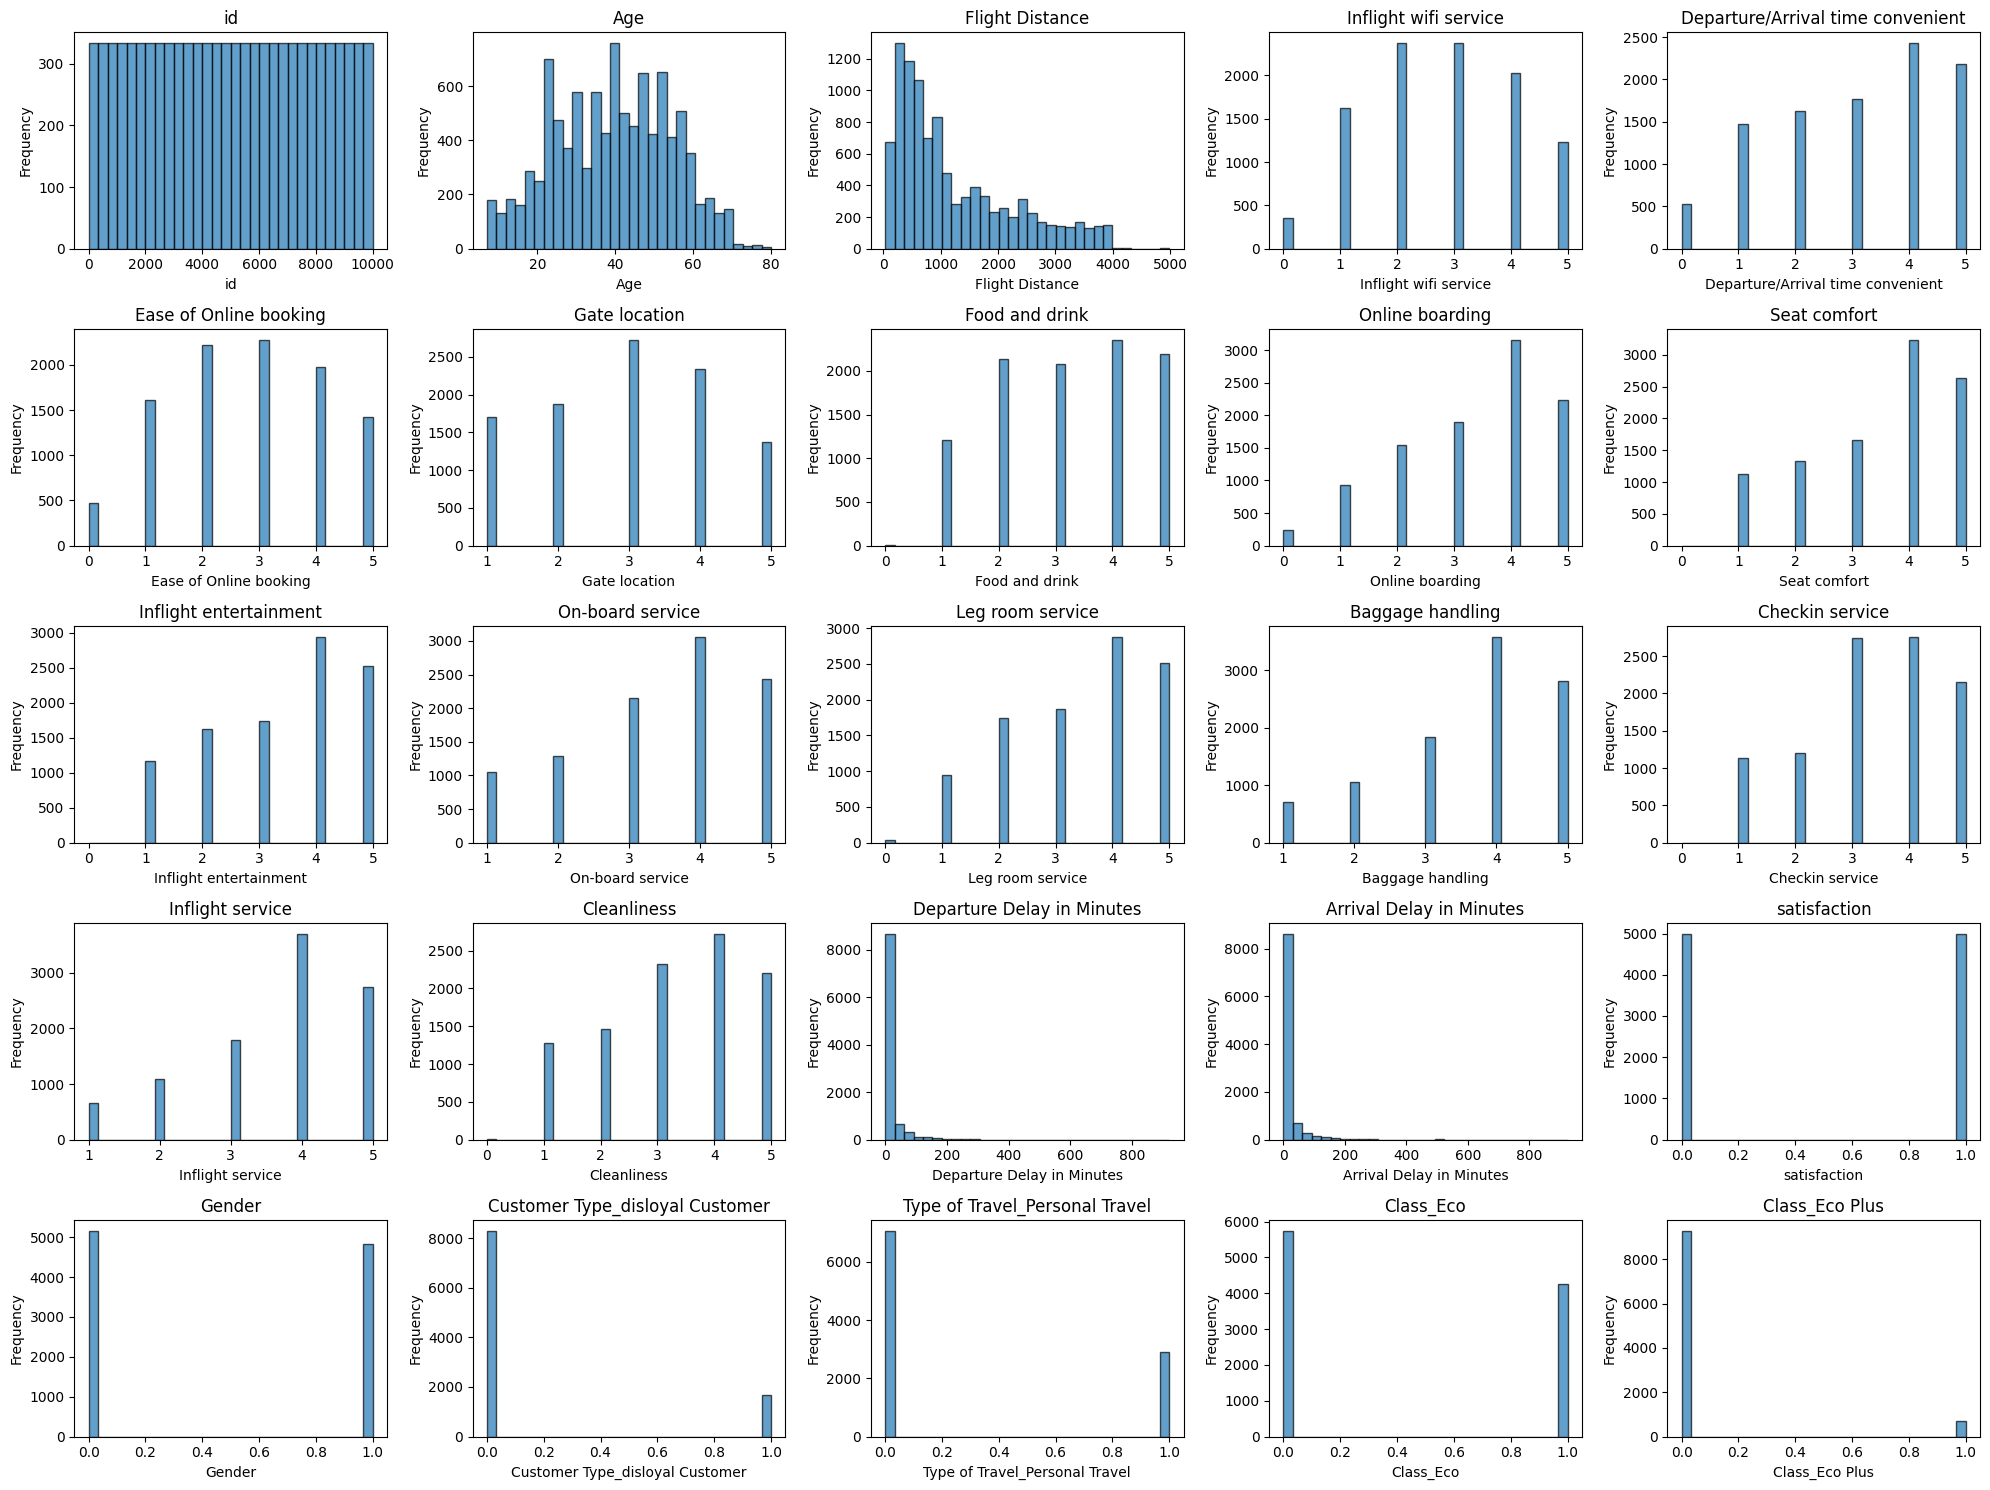

In [16]:
import matplotlib.pyplot as plt

numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot histograms for numerical columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i)
    plt.hist(train_data[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

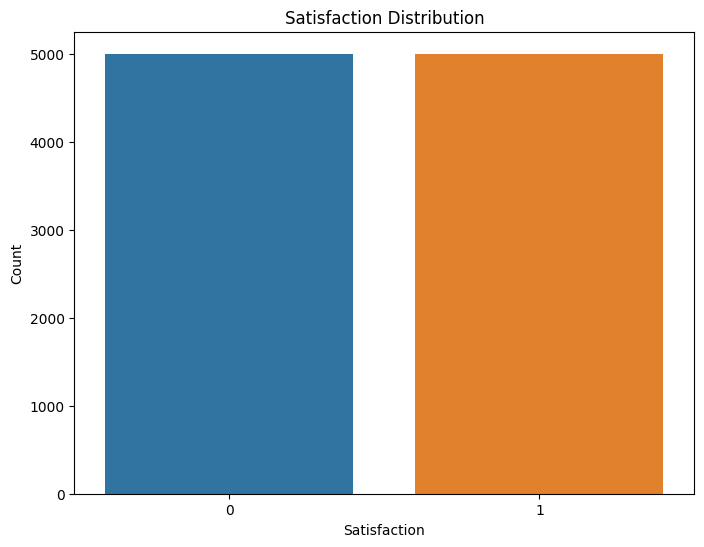

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='satisfaction', data=train_data)
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

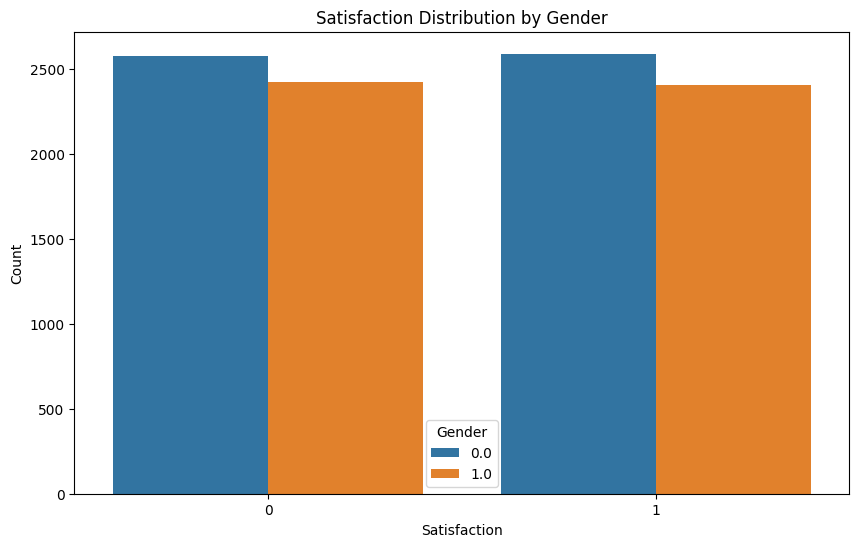

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='satisfaction', hue='Gender', data=train_data)
plt.title('Satisfaction Distribution by Gender')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

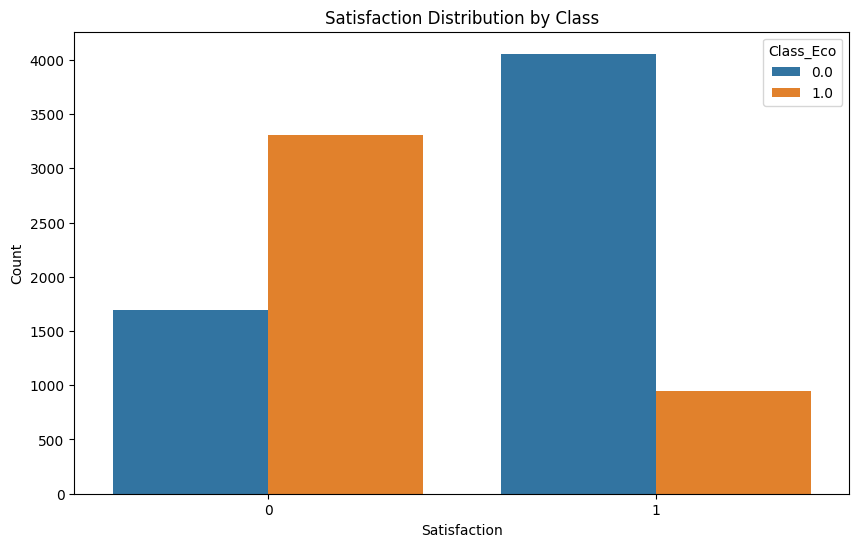

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='satisfaction', hue='Class_Eco', data=train_data)
plt.title('Satisfaction Distribution by Class')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

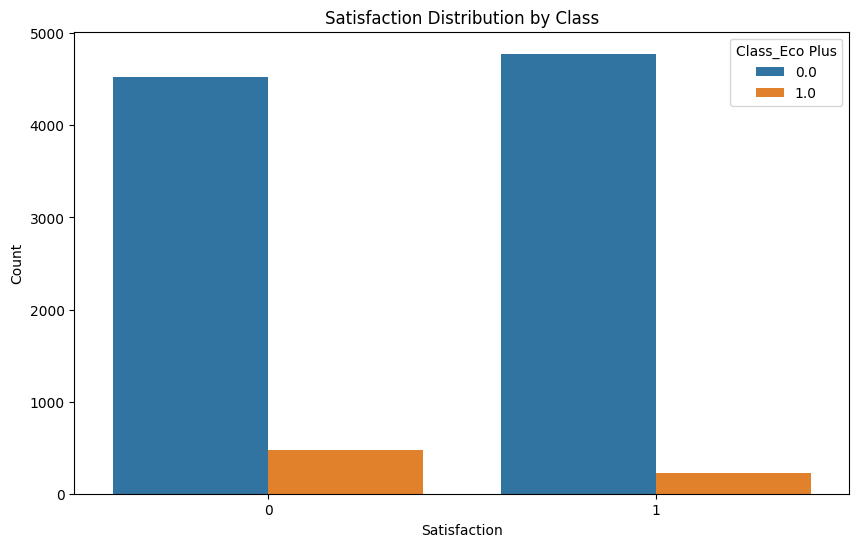

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='satisfaction', hue='Class_Eco Plus', data=train_data)
plt.title('Satisfaction Distribution by Class')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

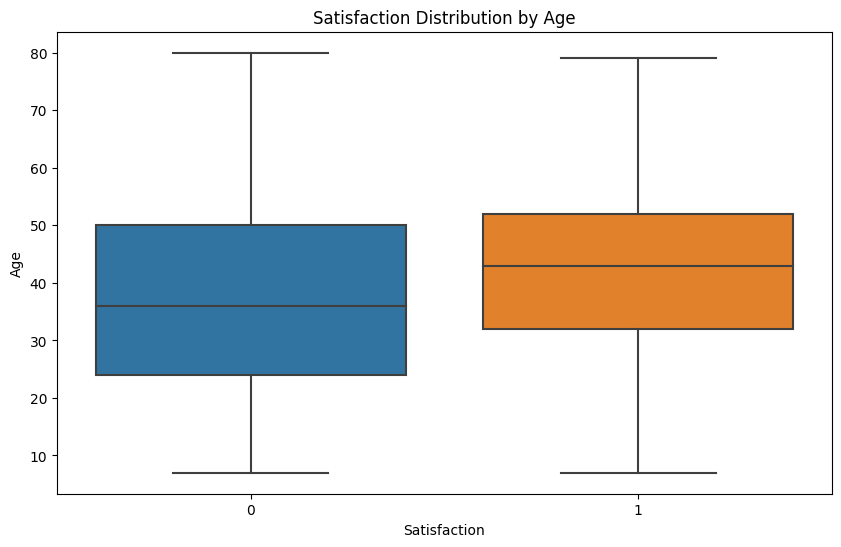

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='satisfaction', y='Age', data=train_data)
plt.title('Satisfaction Distribution by Age')
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.show()

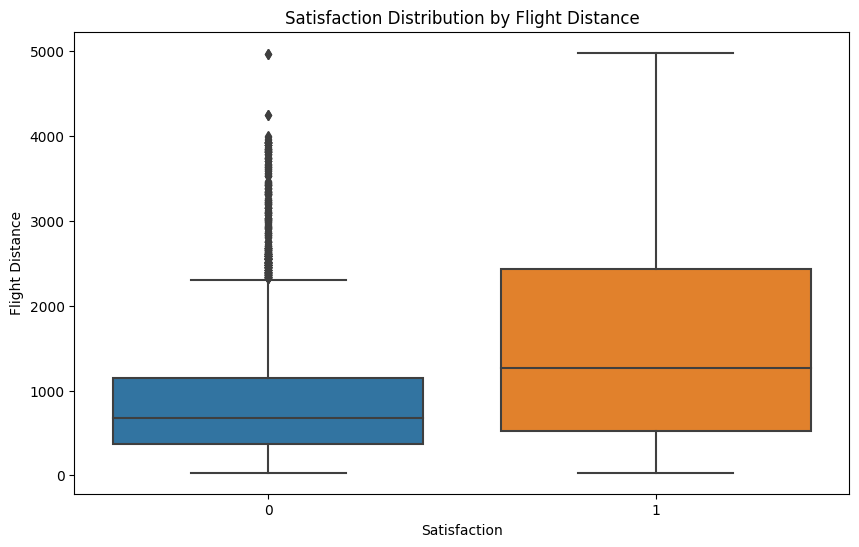

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='satisfaction', y='Flight Distance', data=train_data)
plt.title('Satisfaction Distribution by Flight Distance')
plt.xlabel('Satisfaction')
plt.ylabel('Flight Distance')
plt.show()

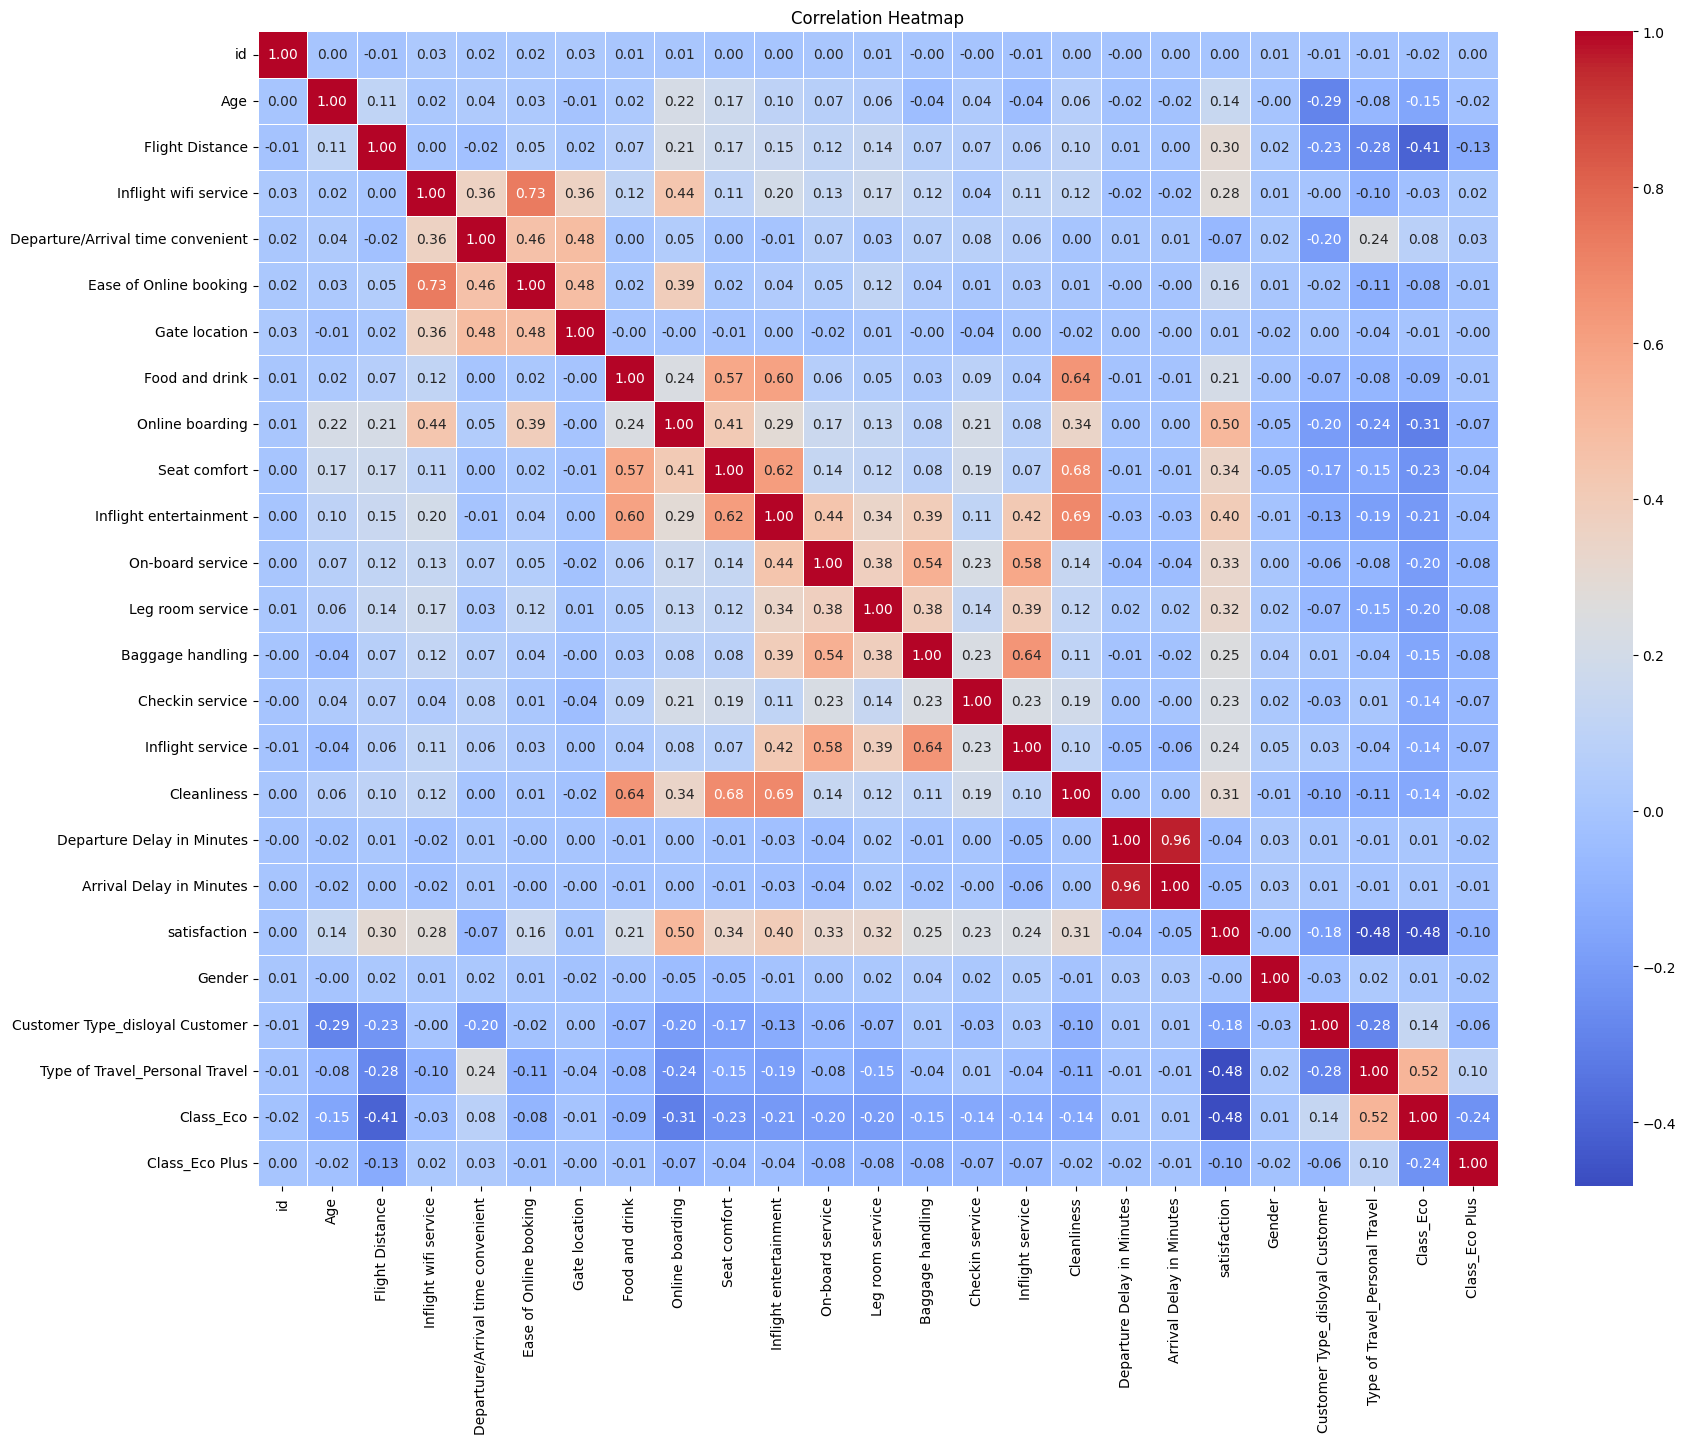

In [23]:
# Compute the correlation matrix
correlation_matrix = train_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
train_data.dtypes

id                                     int64
Age                                    int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfaction                           int64
Gender                               float64
Customer Type_disloyal Customer      float64
Type of Tr

In [25]:
train_data.isnull().sum()

id                                   0
Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
Gender                               0
Customer Type_disloyal Customer      0
Type of Travel_Personal Travel       0
Class_Eco                            0
Class_Eco Plus                       0
dtype: int64

In [26]:
# Importing the necessary module which was missed earlier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Ma'lumotlarni tayyorlash
X = train_data[['Age', 'Flight Distance']]  # mustaqil o'zgaruvchilar
y = train_data['satisfaction']  # bog'liq o'zgaruvchi

# Ma'lumotlarni train/test ga bo'lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modellarni yaratish
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Modellarni o'qitish va baholash
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R^2': r2}

# Natijalarni chiqarish
results_df = pd.DataFrame(results).T
results_df

,MSE,R^2
Linear Regression,0.225089,0.099641
Decision Tree Regression,0.374733,-0.498937
Random Forest Regression,0.250049,-0.000200


In [27]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Ma'lumotlarni X va y ga ajratish
X = train_data.drop(columns=['satisfaction'])
y = train_data['satisfaction'].astype(int)

# Train va Test to'plamlariga bo'lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# NaN qiymatlarni tozalash
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Ma'lumotlarni miqyoslash
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modellar ro'yxati
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Har bir modelni o'qitish va baholash
results = {}
accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = y_pred
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy * 100  # Aniqlikni foiz ko'rinishida saqlash

# Natijalarni DataFrame ga o'tkazish
results_df = pd.DataFrame(results)
print("Bashorat natijalari:")
print(results_df.head())  # Natijalarni ko'rsatish

# Aniqliklarni DataFrame ga o'tkazish
accuracy_df = pd.DataFrame(accuracies, index=[0])
print("\nAniqlik natijalari (%):")
print(accuracy_df)  # Aniqliklarni foiz ko'rinishida ko'rsatish

# Natijalarni CSV faylga saqlash
results_df.to_csv('prediction_results.csv', index=False)
accuracy_df.to_csv('model_accuracies.csv', index=False)


Bashorat natijalari:
   Logistic Regression  Decision Tree  Random Forest  Support Vector Machine  \
0                    0              0              0                       0   
1                    1              1              1                       1   
2                    1              1              1                       1   
3                    0              0              0                       1   
4                    0              0              1                       1   

   K-Nearest Neighbors  
0                    0  
1                    1  
2                    1  
3                    0  
4                    1  

Aniqlik natijalari (%):
   Logistic Regression  Decision Tree  Random Forest  Support Vector Machine  \
0                87.85           92.2          94.55                   93.65   

   K-Nearest Neighbors  
0                 89.7  


In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Ma'lumotlarni yuklash
train_data = pd.read_csv('/kaggle/input/aviakompaniya/train_dataset.csv')
test_data = pd.read_csv('/kaggle/input/aviakompaniya/test_dataset.csv')

# Ma'lumotlarni X va y ga ajratish
X = train_data.drop(columns=['satisfaction'])
y = train_data['satisfaction'].astype(int)

# Train va Test to'plamlariga bo'lish
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# NaN qiymatlarni tozalash va kategorik ma'lumotlarni kodlash
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
test_data = preprocessor.transform(test_data)

# Ma'lumotlarni miqyoslash
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_data_scaled = scaler.transform(test_data)

# Random Forest modelini o'qitish
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Validation to'plamida natijalarni baholash
y_val_pred = model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation to'plamida aniqlik: {accuracy * 100:.2f}%")

# Test to'plamida bashoratlarni yaratish
y_pred = model.predict(test_data_scaled)

# Natijalarni CSV fayl ko'rinishida saqlash
submission = pd.DataFrame({
    'ID': range(len(test_data)),  # test_data ning indeksidan foydalaniladi
    'satisfaction': y_pred
})

# CSV faylini saqlash
submission.to_csv('submission.csv', index=False)

print("Natijalar 'submission.csv' fayliga muvaffaqiyatli saqlandi.")

Validation to'plamida aniqlik: 94.70%
Natijalar 'submission.csv' fayliga muvaffaqiyatli saqlandi.


In [29]:
len(test_data)

4000

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Ma'lumotlarni yuklash
train_data = pd.read_csv('/kaggle/input/aviakompaniya/train_dataset.csv')
test_data = pd.read_csv('/kaggle/input/aviakompaniya/test_dataset.csv')

# Ma'lumotlarni X va y ga ajratish
X = train_data.drop(columns=['satisfaction'])
y = train_data['satisfaction'].astype(int)

# Train va Test to'plamlariga bo'lish
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# NaN qiymatlarni tozalash va kategorik ma'lumotlarni kodlash
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
test_data = preprocessor.transform(test_data)

# Ma'lumotlarni miqyoslash
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_data_scaled = scaler.transform(test_data)

# Random Forest modelini o'qitish
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Validation to'plamida natijalarni baholash
y_val_pred = model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation to'plamida aniqlik: {accuracy * 100:.2f}%")

# Test to'plamida bashoratlarni yaratish
y_pred = model.predict(test_data_scaled)

# Natijalarni CSV fayl ko'rinishida saqlash
submission = pd.DataFrame({
    'id': range(1, len(test_data) + 1),  # ID ustunini 1 dan 4000 gacha
    'satisfaction': y_pred
})

# CSV faylini saqlash
submission.to_csv('submission.csv', index=False)

print("Natijalar 'submission.csv' fayliga muvaffaqiyatli saqlandi.")

Validation to'plamida aniqlik: 94.70%
Natijalar 'submission.csv' fayliga muvaffaqiyatli saqlandi.
